En esta lección usarás este conjunto de datos para aprender a tratar los datos cuantitativos ausentes, con el objetivo de comparar el tiempo promedio que pasan en el sitio web los usuarios y las usuarias de dispositivos móviles y de escritorio.

Hemos guardado el archivo en la carpeta /datasets con el nombre web_analytics_data.csv. Carga los datos en la variable analytics_data e imprime las 10 primeras líneas.

import pandas as pd

analytics_data = pd.read_csv('/datasets/web_analytics_data.csv')
print(analytics_data.head(10))

Al igual que el conjunto de datos de la fuente de tráfico con la que trabajaste anteriormente, cada fila de este conjunto de datos corresponde a una visita al sitio web. Para cada visita, tenemos:

'user_id': identifica de forma única a cada visitante del sitio web (Id de usuario);

'device_type': tipo de dispositivo utilizado para acceder al sitio web;

'age': edad (en años) de las personas que visitan el sitio;

'time': periodo de tiempo, en segundos, que las personas pasan en el sitio web.

Pregunta

¿Qué columnas de este conjunto de datos de análisis web son variables cuantitativas?

Elige tantas como quieras
'user_id'

'device_type'

*'age'
¡'age' es sin duda una columna cuantitativa!

*'time'
¡Estamos de acuerdo! Podemos decir que la columna 'time' es una variable cuantitativa.

¡Lo has entendido bien!

Así es, 'age' y 'time' son cuantitativas, mientras que 'user_id' y 'device_type' son categóricas.

Puedes estar pensando, "¡pero la columna 'user_id' contiene números!". Es verdad, y si llamaste a info() en el DataFrame, hallarías que 'user_id' es un tipo de datos enteros (te recomendamos que hagas esto en el sandbox, incluso cuando llamar a info() no sea parte de la tarea). Pero recuerda que los ID son categóricos, no cuantitativos. Es importante tener en mente estas propiedades de los datos al realizar el análisis.

Además, observa que especificamos unidades para las variables cuantitativas (años y segundos). Es importante que siempre tengas en cuenta las unidades cuando trabajes con datos cuantitativos. Claro, probablemente sea obvio que la columna 'age' está en años, pero es posible que no sea tan obvio que la columna 'time' está en segundos. Cualquiera que sea el caso, es mejor no asumir.

Ahora volvamos a los valores ausentes. En las primeras 10 filas podemos ver que tanto 'age' como 'time' tienen valores NaN. Debido a que queremos hacer cálculos numéricos con estas columnas, no podemos rellenar esos valores con cadenas como 'Unknown' o ''. En su lugar, debemos rellenarlos con valores representativos apropiados. Para estos valores se suele utilizar la media o la mediana del conjunto de datos.

Recuerda que la media es la suma de todos los valores dividida entre el número total de valores y la mediana es el valor que se encuentra en el centro cuando los valores se ordenan.

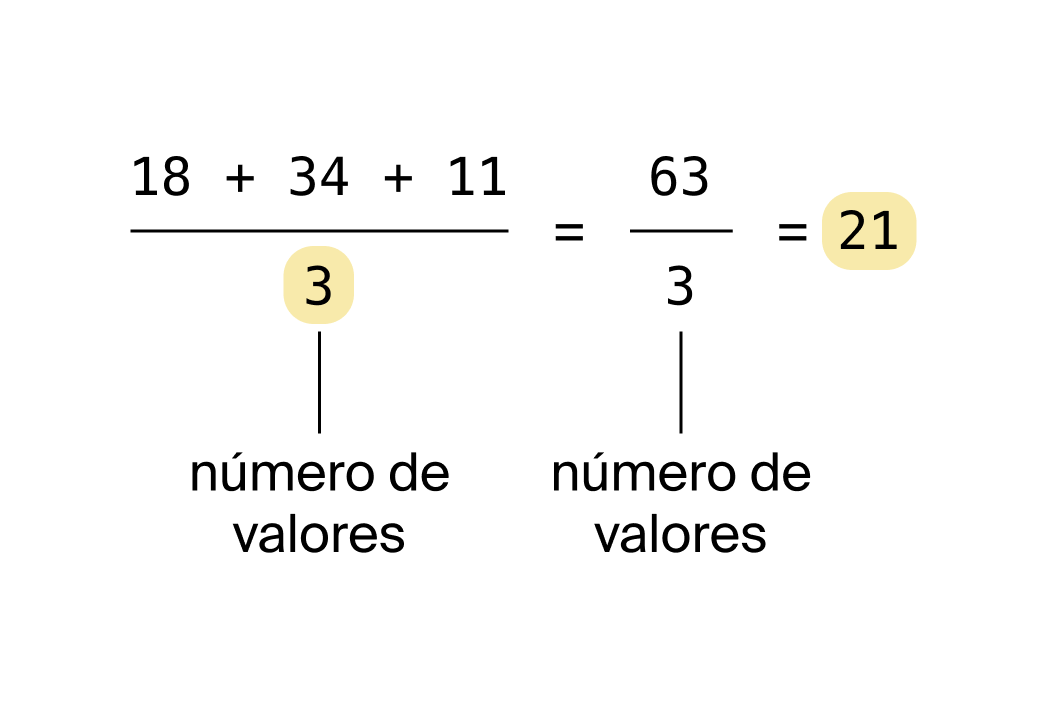

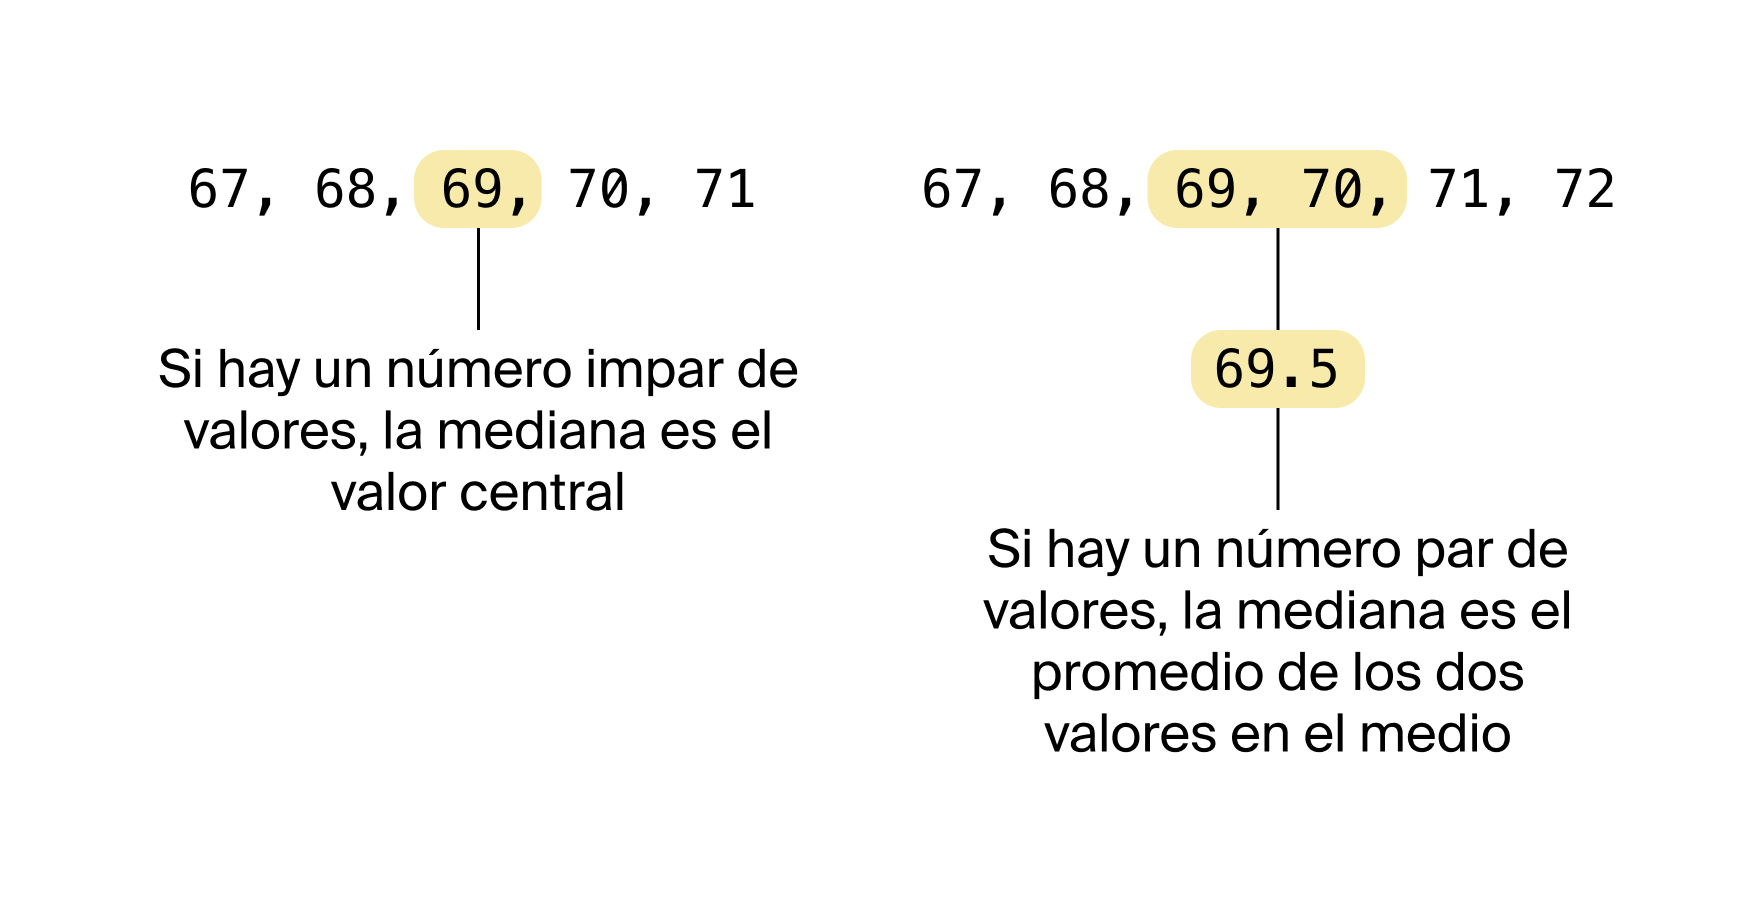

Cuándo usar la media o la mediana
Si conocemos tanto la media como la mediana, ¿cómo vamos a elegir cuál de ellas utilizar como valor representativo? Bueno, depende de cuál sea más representativo de un valor "típico" para nuestro conjunto de datos.

La media no es un buen valor típico cuando los datos con los que se trabaja tienen valores atípicos importantes. Por ejemplo, supongamos que cinco empleados de una empresa tienen sueldos de 30 000 dólares. Tanto la media como la mediana son iguales a 30 000 dólares.

Entonces se contrata a un director de marketing con un sueldo de 90 000 dólares. La media ha subido a 40 000 dólares, mientras que la mediana sigue siendo de 30 000 dólares.

Este valor atípico hace que la mediana sea un mejor indicador del salario típico que la media.

Resumiendo
Para decidir si la media o la mediana es un valor más representativo, podemos seguir estos pasos:

Determina si los datos tienen valores atípicos significativos.

Si no hay valores atípicos significativos, calcula la media utilizando el método mean().

Si tus datos tienen valores atípicos significativos, calcula la mediana utilizando el método median().

Reemplaza los valores ausentes con la media o la mediana utilizando el método fillna().

También vale la pena señalar que a veces no necesitamos rellenar los valores ausentes en absoluto.  Por ejemplo, si solo falta una pequeña parte de tus datos, y los datos ausentes son aleatorios, podría ser buena idea dejar los valores como NaN, en cuyo caso simplemente no se incluirían en ningún cálculo numérico.

Podremos analizar los datos de los usuarios web para encontrar factores distintos de las fuentes de tráfico que influyen en las decisiones de compra. Pero para ello, primero tendremos que rellenar los valores ausentes en las columnas 'age' y 'time'.

Comprobar los valores atípicos
Antes de que comiences a rellenar los valores cuantitativos ausentes, siempre debes comprobar si hay valores atípicos. Pero por ahora, te ahorraremos los pasos adicionales, ya que no hay valores atípicos importantes en nuestro conjunto de datos de marketing.

Pregunta

Teniendo en cuenta la información anterior, ¿cuál puede ser el valor representativo de los datos?

*La media.
Solo se recomienda utilizar la media cuando no hay valores atípicos.

La mediana.

¡Buen trabajo!

Como no hay valores atípicos importantes en los datos, podemos utilizar la media como valor representativo tanto para 'age' como para 'time'. En el siguiente código, calculamos la edad promedio y la guardamos en una variable llamada age_avg, luego la usamos para completar los valores ausentes de 'age':

import pandas as pd

analytics_data = pd.read_csv('/datasets/web_analytics_data.csv')

age_avg = analytics_data['age'].mean()
print("Mean age:", age_avg)

analytics_data['age'] = analytics_data['age'].fillna(age_avg)
Mean age: 32.48966336969903

Observa que, de forma predeterminada, las filas con valores ausentes de 'age' no se incluyen en el cálculo mediante el método mean().

Y así, nos hemos ocupado de nuestros valores ausentes de 'age'. Ahora es momento de que rellenes los valores de 'time' que están ausentes en las tareas.

Ejercicio 1

Recuerda que queremos comparar el tiempo promedio que pasan en el sitio web las personas que utilizan dispositivos móviles y de escritorio, luego usaremos esos tiempos promedio para rellenar los valores ausentes.

Comienza dividiendo los datos en dos DataFrames: uno para visitas desde dispositivos de escritorio y otro para visitas desde dispositivos móviles. Asigna las visitas de escritorio a una variable llamada desktop_data y las visitas móviles a otra variable llamada mobile_data.

El precódigo ya lee los datos y rellena los valores ausentes de 'age'. Este también llama a info() por ti después de crear tus DataFrames filtrados para que puedas ver cuántos valores ausentes hay para cada dispositivo.

In [ ]:
import pandas as pd

analytics_data = pd.read_csv('/datasets/web_analytics_data.csv')

age_avg = analytics_data['age'].mean()
analytics_data['age'] = analytics_data['age'].fillna(age_avg)

desktop_data = analytics_data[analytics_data['device_type'] == 'desktop']#completa esta línea
mobile_data = analytics_data[analytics_data['device_type'] == 'mobile']# completa esta línea

desktop_data.info()
print()
mobile_data.info()

"""Resultado
<class 'pandas.core.frame.DataFrame'>
Int64Index: 73764 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      73764 non-null  int64  
 1   device_type  73764 non-null  object 
 2   age          73764 non-null  float64
 3   time         61588 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.8+ MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26236 entries, 1 to 99997
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      26236 non-null  int64  
 1   device_type  26236 non-null  object 
 2   age          26236 non-null  float64
 3   time         13823 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.0+ MB"""

Ejercicio 2
Ahora que los datos de escritorio y móviles están separados, calcula el tiempo medio de visita para cada dispositivo.

Asigna la media del tiempo de visita de los usuarios de escritorio a una variable llamada desktop_avg y la media de los usuarios móviles a mobile_avg. 

El precódigo ya contiene el código para imprimir tus resultados.

In [ ]:
import pandas as pd

analytics_data = pd.read_csv('/datasets/web_analytics_data.csv')

age_avg = analytics_data['age'].mean()
analytics_data['age'] = analytics_data['age'].fillna(age_avg)

desktop_data = analytics_data[analytics_data['device_type'] == 'desktop']
mobile_data =  analytics_data[analytics_data['device_type'] == 'mobile']

desktop_avg = desktop_data['time'].mean()#completa esta línea
mobile_avg =  mobile_data['time'].mean()#completa esta línea

print(f"Tiempo de escritorio promedio: {desktop_avg:.2f} segundos")
print(f"Tiempo móvil promedio: {mobile_avg:.2f} segundos")

#Tiempo de escritorio promedio: 1741.87 segundos
#Tiempo móvil promedio: 41.16 segundos

Utiliza el tiempo promedio de visita de escritorio para rellenar los valores ausentes en la columna 'time' de desktop_data y el tiempo promedio de visita móvil para rellenarlos en mobile_data.

El precódigo contiene tu trabajo de las tareas anteriores y llama a info() para que compruebes que los valores ausentes se hayan rellenado.

Es posible que también hayas visto un SettingWithCopyWarning cuando ejecutaste tu código. No hay nada de que preocuparse en este caso, pero si deseas obtener más información al respecto consulta la documentación (materiales en inglés).

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

analytics_data = pd.read_csv('/datasets/web_analytics_data.csv')

age_avg = analytics_data['age'].mean()
analytics_data['age'] = analytics_data['age'].fillna(age_avg)

desktop_data = analytics_data[analytics_data['device_type'] == 'desktop']
mobile_data =  analytics_data[analytics_data['device_type'] == 'mobile']

desktop_avg = desktop_data['time'].mean()
mobile_avg = mobile_data['time'].mean()

# escribe tu código aquí para rellenar los valores ausentes
desktop_data['time'] = desktop_data['time'].fillna(desktop_avg)
mobile_data['time'] = mobile_data['time'].fillna(mobile_avg)
# esto comprobará si tienes algún valor ausente
desktop_data.info()
print()
mobile_data.info()

"""Resultado
<class 'pandas.core.frame.DataFrame'>
Int64Index: 73764 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      73764 non-null  int64  
 1   device_type  73764 non-null  object 
 2   age          73764 non-null  float64
 3   time         73764 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.8+ MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26236 entries, 1 to 99997
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      26236 non-null  int64  
 1   device_type  26236 non-null  object 
 2   age          26236 non-null  float64
 3   time         26236 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.0+ MB"""

Filtra los datos para obtener solo las filas de la región 'North' y 'South'. Luego, usa el tiempo promedio de ingresos de cada región para rellenar los valores ausentes en la columna 'revenue'. Utiliza el promedio de ingresos de la región 'North' para rellenar los valores ausentes en esa región, y lo mismo para la región 'South'. Además, imprime los promedios calculados para cada región.

El precódigo contiene el conjunto de datos que se utilizó en ejercicios anteriores y llama a info() para verificar que los valores ausentes hayan sido rellenados correctamente.

In [ ]:
import pandas as pd

data = {
    'user_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'region': ['North', 'South', 'North', 'South', 'North', 'South', 'North', 'South', 'North', 'South'],
    'age': [25, 34, 45, None, 38, 50, None, 28, 42, 35],
    'revenue': [120, 80, 130, 95, None, None, 125, 90, None, 110]
}

# Convertir a DataFrame
sales_data = pd.DataFrame(data)

# Filtrar los datos por región
north_data = sales_data[sales_data['region'] == 'North']
south_data = sales_data[sales_data['region'] == 'South']

# Calcular el promedio de ingresos por región
north_avg = north_data['revenue'].mean()
south_avg = south_data['revenue'].mean()

# Imprimir los promedios calculados
print(f"Promedio de ingresos en 'North': {north_avg}")
print(f"Promedio de ingresos en 'South': {south_avg}")

# Rellenar los valores ausentes con el promedio de ingresos por región
north_data['revenue'] = north_data['revenue'].fillna(north_avg)
south_data['revenue'] = south_data['revenue'].fillna(south_avg)

# Comprobar si aún hay valores ausentes
north_data.info()
print()
south_data.info()

"""Promedio de ingresos en 'North': 125.0
Promedio de ingresos en 'South': 93.75
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 8
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  5 non-null      int64  
 1   region   5 non-null      object 
 2   age      4 non-null      float64
 3   revenue  5 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 200.0+ bytes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 9
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  5 non-null      int64  
 1   region   5 non-null      object 
 2   age      4 non-null      float64
 3   revenue  5 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 200.0+ bytes"""
